Serinin 1. ve 2. yazısında Python'ın popüler pandas, matplotlib, seaborn kütüphanelerini kullanarak veri analizi ve görselleştirme çalışmaları yapmıştık, umarım keyifli bir başlangıç olmuştur.

İlk iki yazıyı makine öğrenmesinden ziyade Python'a giriş olarak düşünebiliriz. Bu yazıdan itibaren farklı alanlardaki veri setleri üzerinde çeşitli makine öğrenmesi modelleri kurup bu modellerimizin kalitesini oranlarını arttırmak için çeşitli yöntemler deneyeceğiz.

Makine öğrenmesi modelleri arasında insanın düşünme tarzına en yakın olanın Karar Ağaçları (Decision Tree) olduğu düşünülür. Sözgelimi iş yerinizde öğle arası 12.30-13.30 arasıysa ve saat 12.10'sa biraz daha beklemeliyim diye düşünmeniz en basit karar ağacı modeline örnek olabilir.

İnsanların zihnindeki bazı karar ağaçlarının derinliği yukarıdaki gibi 1-2 olmakla birlikte çoğu zaman çok daha karmaşık karar ağaçları kurulur. Örneğin insan kaynakları departmanında çalışan birinin zihninde aşağıdakine benzer bir karar ağacı olabilir.

Eğer bir kişi x-y yaş aralığındaysa a, b, c, d, e okullarından mezunsa en az t yıl tecrübesi varsa ve daha önceki işlerinde çalışma süresi ortalama p yıldan fazlaysa mülakata çağıralım.

Karar Ağaçları bulunulan durumun entropi değerini (rastgelelik derecesini) düşüren seçimler yaparak bilgi kazancını (information gain) maksimize etmeye çalışır. Bunun için de her soruda (düğüm/node) hata fonksiyonunu tekrar hesaplayıp en düşük hataya sahip soruyu/durumu seçer.

Bilgi kazancını anlamak için de hemen herkesin bildiği sayı tutma oyununu düşünebiliriz . Örneğin 1'den 100'e kadar bir sayıyı en az soruyla bulmamız bekleniyorsa "sayı 50'den büyük mü küçük mü?" sorusunun cevabı "sayı 95'ten büyük mü küçük mü?" sorusunun cevabından daha çok bilgi kazanmamızı sağlar. Çünkü ilk soruyla seçenekleri yarıya indiririz. Sonrasında küçük cevabına karşı "sayı 25'ten büyük mü küçük mü?" diye oyunu en kısa sürede sonlandırabiliriz.

İlk derste olduğu gibi bu dersi takip etmek için de bilgisayarınıza Python kurmanıza veya veri setini indirmenize gerek yok. İhtiyacınız olan tek şey internet ve bu yazıyı okuduğunuza göre o konuda da bir sorunumuz yok. İzlemeniz gereken adımlar sırasıyla şöyle:

- Google hesabınızı açın.
- https://colab.research.google.com/ adresine gidin.
- NEW PYTHON 3 NOTEBOOK'a tıklayın.
- Oradaki satıra aşağıdaki kodu yapıştırın ve play tuşuna basın.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_csv('data/housing.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Modelimizdeki hedef değişken 'median_house_value' olduğu için onun dağılımına bakıyoruz ve veri setinin geri kalanından ayırıyoruz.

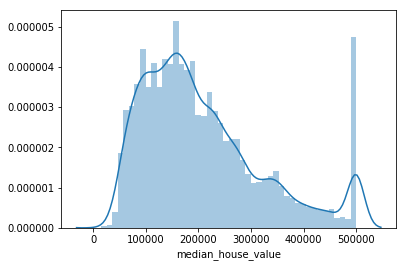

In [9]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
sns.distplot(y)
plt.show()

Makine öğrenmesi modelleri kategorik değişkenleri algılayamadığı için 'object' tipindeki değişkenleri one-hot-encoding yöntemiyle 0 ve 1'lere ayırıyoruz. Ayrıca 'total_bedroom' değişkenindeki eksik değerleri doldurmamız gerekiyor. 

Yapmamız gerekenler sırasıyla şöyle:

1. ocean_proximity değişkeni pd.get_dummies() fonksiyonuyla zenginleştirilir.
2. Bu değişken veri setinden atılır.
3. total_bedroom değişkeni yine o sütunun median() değeriyle doldurulur.

In [15]:
X = pd.concat([X, pd.get_dummies(X.ocean_proximity)], axis=1)
X = X.drop(['ocean_proximity'],axis=1)
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())

Modelimizi kurmaya hazırız şimdi standart modelleme süreçlerini uygulayacağız.

1. Veriyi eğitim ve test alt-veri setlerine ayırma.
2. Karar ağacı modeli oluşturma.
3. Modeli eğitim verisine 'fit' etme.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
d_tree1 = DecisionTreeRegressor(max_depth = 3, random_state=42)
d_tree1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

4. Görmediğimiz test verisine modele verip tahminde bulunma.
5. Gerçek değerle tahmin arasındaki benzerliğe göre mean absolute error ve accuracy hesaplama.

In [19]:
predictions = d_tree1.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 55653.73 unit.
Accuracy: 68.285 %.


6. Karar ağacını görselleştirme

In [20]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(d_tree1, feature_names = X.columns,
               out_file = dot_data, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x08p\x00\x00\x01\xf1\x08\x02\x00\x00\x00\x80\xdaN\x9…

8. Sınıflandırma modeli kurulurken yapılan öznitelik önem sıralamasını görselleştirme. 

Burada derinliği 8 olan yeni bir model kurup o modelin başarı oranına bakıyoruz ve öznitelik sıralamasını görselleştiriyoruz.

Mean Absolute Error: 43420.7 unit.
Accuracy: 75.977 %.


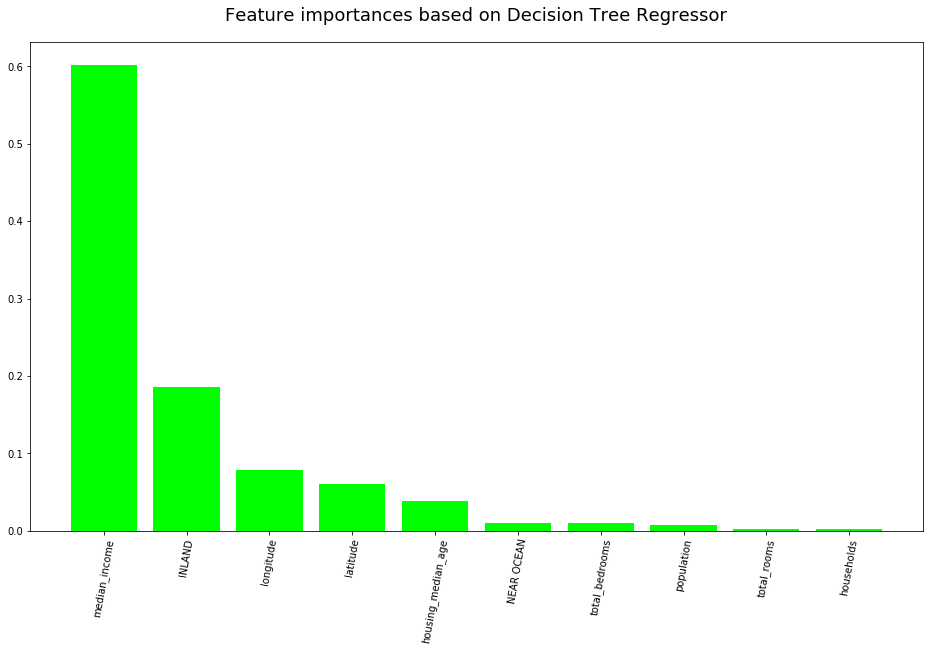

In [22]:
d_tree2 = DecisionTreeRegressor(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
predictions = d_tree2.predict(X_test)

errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

plt.figure(figsize=(16, 9))

ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Decision Tree Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

Başarı oranımız ciddi bir şekilde arttı. Bu çalışma standart bir veri bilimi projesinin en basit hali olarak düşünülebilir. 

Yaptıklarımızı tekrarlayalım:

- Veri tiplerini kontrol etme/düzeltme.
- Açıklayıcı veri analizi ve görselleştirme.
- Eksik verileri tahmin etme/veri atama.
- Kategori tipindeki verileri one-hot encoding ile nümerik formata çevirme.
- Veri setini eğitim ve test veri-setlerine ayırma.
- Modeli eğitme ve test verisi üzerinde tahmin yapma.
- Sınıflandırma başarı metriklerine bakma.
- Karar ağacını görselleştirme.
- Modelin yaptığı öznitelik sıralamasını görselleştirme.